# **End to End Detect AI vs Human Generated Images**

## **lets import the tools**

In [1]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lets import train data set
train_df = pd.read_csv("/kaggle/input/human-vs-ai-test-data-set/train.csv")
labels = train_df["label"]

In [3]:
labels

0        1
1        0
2        1
3        0
4        1
        ..
79945    0
79946    1
79947    0
79948    1
79949    0
Name: label, Length: 79950, dtype: int64

In [4]:
train_df.head()

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


In [5]:
# modified file name column as per my own google colab directory

train_df["file_name"] = "/kaggle/input/human-vs-ai-train-dataset/train_data/" + train_df["file_name"].str.split("/").str[-1]


In [6]:
train_df
# modified file name with my actuaal file path

,Unnamed: 0,file_name,label
0,0,/kaggle/input/human-vs-ai-train-dataset/train_...,1
1,1,/kaggle/input/human-vs-ai-train-dataset/train_...,0
2,2,/kaggle/input/human-vs-ai-train-dataset/train_...,1
3,3,/kaggle/input/human-vs-ai-train-dataset/train_...,0
4,4,/kaggle/input/human-vs-ai-train-dataset/train_...,1
...,...,...,...
79945,79945,/kaggle/input/human-vs-ai-train-dataset/train_...,0
79946,79946,/kaggle/input/human-vs-ai-train-dataset/train_...,1
79947,79947,/kaggle/input/human-vs-ai-train-dataset/train_...,0
79948,79948,/kaggle/input/human-vs-ai-train-dataset/train_...,1


In [7]:
train_df = train_df.drop(columns=["Unnamed: 0"])
train_df

,file_name,label
0,/kaggle/input/human-vs-ai-train-dataset/train_...,1
1,/kaggle/input/human-vs-ai-train-dataset/train_...,0
2,/kaggle/input/human-vs-ai-train-dataset/train_...,1
3,/kaggle/input/human-vs-ai-train-dataset/train_...,0
4,/kaggle/input/human-vs-ai-train-dataset/train_...,1
...,...,...
79945,/kaggle/input/human-vs-ai-train-dataset/train_...,0
79946,/kaggle/input/human-vs-ai-train-dataset/train_...,1
79947,/kaggle/input/human-vs-ai-train-dataset/train_...,0
79948,/kaggle/input/human-vs-ai-train-dataset/train_...,1


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79950 entries, 0 to 79949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  79950 non-null  object
 1   label      79950 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [9]:
train_df.isnull().sum()

file_name    0
label        0
dtype: int64

In [10]:
# extracting file path form my modified data set above
file_names = [fname for fname in train_df["file_name"]]
file_names[:5]
# see below our file path is ready to view images from my google drive

['/kaggle/input/human-vs-ai-train-dataset/train_data/a6dcb93f596a43249135678dfcfc17ea.jpg',
 '/kaggle/input/human-vs-ai-train-dataset/train_data/041be3153810433ab146bc97d5af505c.jpg',
 '/kaggle/input/human-vs-ai-train-dataset/train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg',
 '/kaggle/input/human-vs-ai-train-dataset/train_data/8542fe161d9147be8e835e50c0de39cd.jpg',
 '/kaggle/input/human-vs-ai-train-dataset/train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg']

In [11]:
labels[0] # so perfectly image viewed above so our file path works perfectly and here label index 0 indicate 1 so the above picture is AI generated images
# as of now everything works perfectly

1

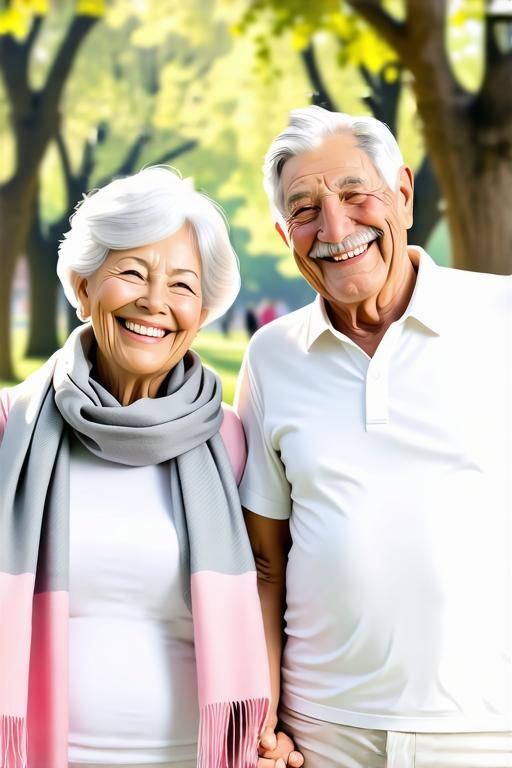

In [12]:
# make sure that our above file path works perfectly
from IPython.display import Image
Image(file_names[0])

In [13]:
labels.value_counts()
# so in our dataset both Human and AI generated dataset are equally splitted

label
1    39975
0    39975
Name: count, dtype: int64

In [14]:
base_path = "/kaggle/input/human-vs-ai-train-dataset/train_data"
files = os.listdir(base_path)
check_1 = len(files)

if check_1 == len(train_df):
  print("Succesfull They match Perfectly")
else:
  print("Try Again")

# checking both our train df and actual images are in equal numbers

Succesfull They match Perfectly


In [15]:
# Lets check the tensorflow version
print("Tensorflow Version", tf.__version__)
print("Tensorflow Hub Version",hub.__version__)

Tensorflow Version 2.17.1
Tensorflow Hub Version 0.16.1


In [16]:
# checking GPU Availability
print("GPU Available" if tf.config.list_logical_devices("GPU") else "Not Available")

GPU Available


In [17]:
# lets change labels into arrays
labels = train_df['label']
labels = np.array(labels)
labels

array([1, 0, 1, ..., 0, 1, 0])

In [18]:
# lets unique labels
unique_labels = np.unique(labels)
unique_labels
# Here 0 Means Human Created Images And 1 Means AI Generated Images

array([0, 1])

In [19]:
len(unique_labels)

2

In [20]:
boolean_labels = [label == np.array(unique_labels ) for label in labels]
boolean_labels[:10]

# convert our labels into boolean

[array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False])]

In [21]:
len(boolean_labels)

79950

In [22]:
X = file_names
Y = boolean_labels

## **Lets Build Funtions**

In [23]:
# Tuning Images into Tensors

IMG_SIZE = 224

# data agumentation pipeline
data_agumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('Horizontal_and_Vertical_Flip'),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2),
])

def process_image(image_path, img_size= IMG_SIZE, augment = False):
  """""
  Turn Images into Tensors

  """""
  image = tf.io.read_file(image_path)  # Read image file as binary
  image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG to tensor
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)  # Normalize to [0, 1]
  image = tf.image.resize(image, size=[img_size, img_size])  # Resize to target size



  if augment:
    image = data_agumentation(image)
  return image


In [24]:

def get_image_label(image_path,label):
  image=process_image(image_path)
  return image, label


In [25]:
# Demo for above function
(process_image(X[1]),tf.constant(Y[1]))
# see here our Index image 1 turned into tensors our functions working fine

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.2157063 , 0.23839538, 0.06836735],
         [0.25736296, 0.28005204, 0.11002401],
         [0.19849941, 0.21810725, 0.05882353],
         ...,
         [0.35302076, 0.36702654, 0.06376592],
         [0.40160137, 0.4455791 , 0.2206496 ],
         [0.41912588, 0.48551255, 0.32556912]],
 
        [[0.22078833, 0.2364746 , 0.09641857],
         [0.24985996, 0.26554623, 0.1254902 ],
         [0.26718688, 0.28287315, 0.13777511],
         ...,
         [0.49667832, 0.5143257 , 0.24425797],
         [0.42224824, 0.45838284, 0.2446577 ],
         [0.30912226, 0.36290404, 0.19545743]],
 
        [[0.21232495, 0.22801122, 0.09859945],
         [0.2181873 , 0.23387358, 0.10394159],
         [0.2584434 , 0.27412966, 0.13519408],
         ...,
         [0.27865157, 0.2979194 , 0.076411  ],
         [0.28441316, 0.31604588, 0.11768673],
         [0.2438582 , 0.28139347, 0.10790434]],
 
        ...,
 
        [[0.73043174, 0.7158659 

In [26]:
# Define the batch

BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, Y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(Y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(Y)))
    # Shuffling pathnames and labels before mapping image processor
    data = data.shuffle(buffer_size=len(X))

    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [27]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_10_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 10 to display 10 images
  for i in range(10):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_labels[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [28]:

# Lets import model from kaggle hub
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_labels)

# Download latest version we are going to use resnet_v2_50 model

# changed model url from tensorFlow2 to classification
MODEL_URL = "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5"

print("Path to model files:", MODEL_URL)

Path to model files: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5


In [29]:
import tensorflow_hub as hub
layer = hub.KerasLayer(MODEL_URL, trainable=False)
layer
# model is ready to go

In [30]:

!pip install tf_keras

In [31]:

# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [32]:

model=create_model()
model.summary()


Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              25615849  
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 25617853 (97.72 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 25615849 (97.72 MB)
_________________________________________________________________


In [33]:

# Load TensorBoard notebook extension
%load_ext tensorboard

# this is the magic function

In [34]:

import datetime
import os


# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/kaggle/working/logs",

  # Make it so the logs get tracked whenever we run an experiment (%year%month%day-%hour%minites% seconds)
  datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return keras.callbacks.TensorBoard(logdir)

  # it will store model records in logdir (log folder) which is iam created specifically to store experiment data

In [35]:

# Create early stopping callback to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [36]:

NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [37]:

def train_model():
    """
    Trains a given model and returns the trained version (without validation data).
    """
    model = create_model()
    tensorboard = create_tensorboard_callback()

    # Fit the model only on training data
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              callbacks=[tensorboard, early_stopping])  # No validation data

    # Return the trained model
    return model


In [38]:

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_labels[np.argmax(prediction_probabilities)]

In [39]:

## lets unbatch then only we are able to visualize
# Create a function to unbatch a batch dataset

def unbatchify(data, include_labels=True):
    """
function for unbatch
    """
    images = []
    labels = []

    # Loop through unbatched data
    for item in data.unbatch().as_numpy_iterator():
        if include_labels:
            image, label = item
            images.append(image)
            labels.append(unique_labels[np.argmax(label)])
        else:
            image = item
            images.append(image)

    return (images, labels) if include_labels else images

In [40]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)


In [41]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_brain_tumor_types[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [42]:

# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/kaggle/working/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [43]:

# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [44]:
len(X), len(Y)

(79950, 79950)

In [45]:

# Create a data batch with the full data set
# calling create_data_batches above function
full_data = create_data_batches(X, Y)


Creating training data batches...


In [46]:

full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))>

In [47]:

# Create full model callbacks
# below create tensorboard also we are calling above function
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [48]:

full_model = create_model() # create model function we created above

Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5


In [49]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
2499/2499 [==============================] - 226s 87ms/step - loss: 0.3944 - accuracy: 0.8293
Epoch 2/100
2499/2499 [==============================] - 228s 91ms/step - loss: 0.3339 - accuracy: 0.8608
Epoch 3/100
2499/2499 [==============================] - 228s 91ms/step - loss: 0.3230 - accuracy: 0.8663
Epoch 4/100
2499/2499 [==============================] - 229s 92ms/step - loss: 0.3187 - accuracy: 0.8684
Epoch 5/100
2499/2499 [==============================] - 229s 92ms/step - loss: 0.3138 - accuracy: 0.8714
Epoch 6/100
2499/2499 [==============================] - 229s 91ms/step - loss: 0.3127 - accuracy: 0.8720
Epoch 7/100
2499/2499 [==============================] - 228s 91ms/step - loss: 0.3081 - accuracy: 0.8719
Epoch 8/100
2499/2499 [==============================] - 228s 91ms/step - loss: 0.3084 - accuracy: 0.8740
Epoch 9/100
2499/2499 [==============================] - 228s 91ms/step - loss: 0.3096 - accuracy: 0.8745
Epoch 10/100
2499/2499 [======================

In [51]:
import os

# Create the models directory
os.makedirs("/kaggle/working/models", exist_ok=True)

# Verify it was created
print("Directories in /kaggle/working:", os.listdir("/kaggle/working"))

# save our model
save_model(full_model, suffix="human_vs_ai-full-image-set-resnetv2_50")

Directories in /kaggle/working: ['logs', 'models', '.virtual_documents']
Saving model to: /kaggle/working/models/20250225-15511740498709-human_vs_ai-full-image-set-resnetv2_50.h5...


'/kaggle/working/models/20250225-15511740498709-human_vs_ai-full-image-set-resnetv2_50.h5'

In [53]:
# now load our full data set trained model

loaded_full_model = load_model('/kaggle/working/models/20250225-15511740498667-human_vs_ai-full-image-set-resnetv2_50.h5')

Loading saved model from: /kaggle/working/models/20250225-15511740498667-human_vs_ai-full-image-set-resnetv2_50.h5


### **Lets start with test data**

In [54]:
test_df2 = pd.read_csv("/kaggle/input/human-vs-ai-test-data-set/test.csv")

In [55]:
test_df2

,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg
...,...
5535,test_data_v2/483412064ff74d9d9472d606b65976d9.jpg
5536,test_data_v2/c0b49ba4081a4197b422dac7c15aea7f.jpg
5537,test_data_v2/01454aaedec140c0a3ca1f48028c41cf.jpg
5538,test_data_v2/e9adfea8b67e4791968c4c2bdd8ec343.jpg


In [56]:
test_df3 = test_df2.copy()
test_df3

,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg
...,...
5535,test_data_v2/483412064ff74d9d9472d606b65976d9.jpg
5536,test_data_v2/c0b49ba4081a4197b422dac7c15aea7f.jpg
5537,test_data_v2/01454aaedec140c0a3ca1f48028c41cf.jpg
5538,test_data_v2/e9adfea8b67e4791968c4c2bdd8ec343.jpg


In [57]:
# modified file name column as per my own google colab directory

test_df3["id"] = "/kaggle/input/human-vs-ai-test-data-set/test_data_v2/test_data_v2/" + test_df3["id"].str.split("/").str[-1]

In [58]:
test_df3[:1]

,id
0,/kaggle/input/human-vs-ai-test-data-set/test_d...


In [59]:
X_test = [fname for fname in test_df3["id"]]

In [60]:
X_test[:1]

['/kaggle/input/human-vs-ai-test-data-set/test_data_v2/test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg']

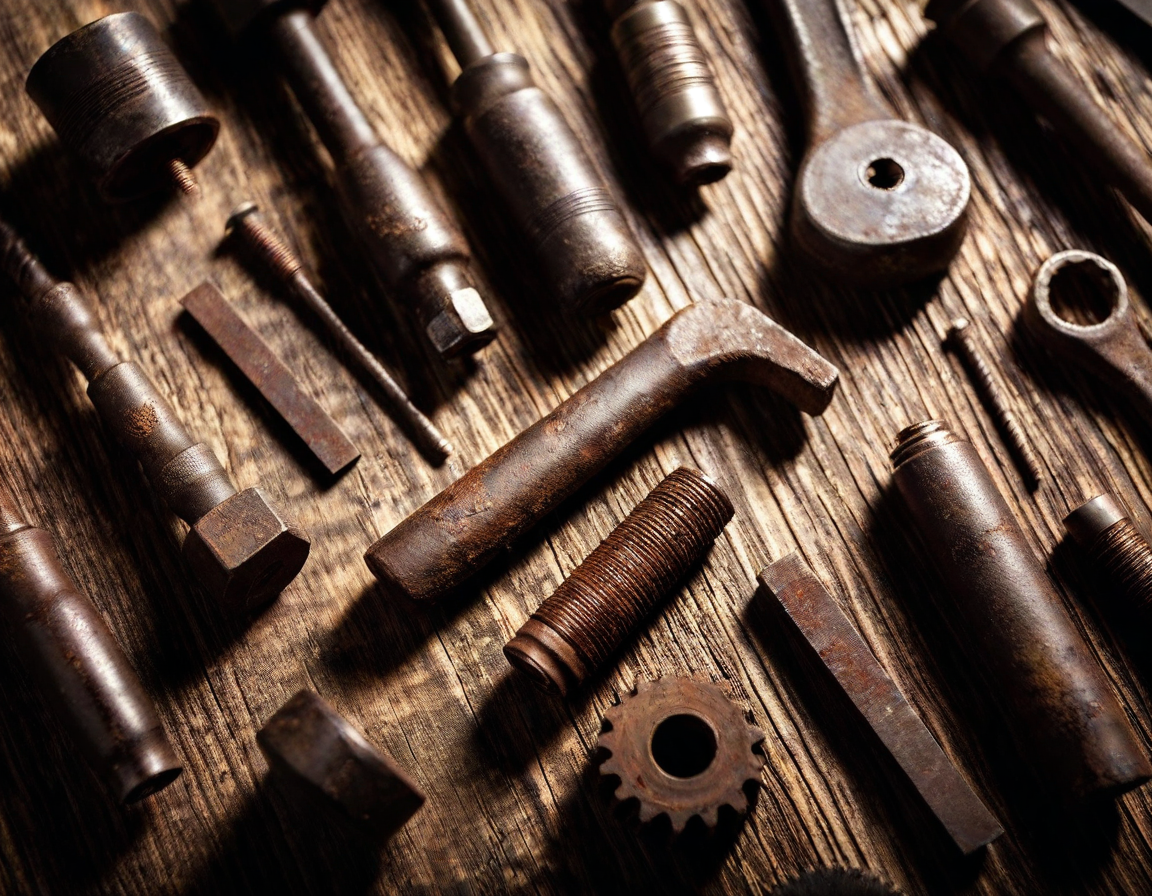

In [61]:

# make sure our file path working correctly
from IPython.display import Image

Image(X_test[1])

In [62]:

test_data_batch = create_data_batches(X_test, test_data=True) # making batches

Creating test data batches...


In [63]:
loaded_full_model

In [64]:

# Make predictions on the test data
test_predictions = loaded_full_model.predict(test_data_batch, verbose=1)


174/174 [==============================] - 58s 332ms/step


In [69]:
pd.DataFrame(test_predictions)

,0,1
0,0.961319,0.038681
1,0.735597,0.264403
2,0.763810,0.236190
3,0.976511,0.023489
4,0.193394,0.806606
...,...,...
5535,0.876143,0.123857
5536,0.974645,0.025355
5537,0.998180,0.001820
5538,0.571229,0.428771


In [68]:
import numpy as np

binary_predictions = (test_predictions >= 0.5).astype(int)

print(binary_predictions)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [71]:
import numpy as np
import pandas as pd

# Assuming test_predictions is your NumPy array and test_ids contains the corresponding IDs
test_ids = test_df2['id']  

# Convert probabilities to binary labels
binary_labels = np.argmax(test_predictions, axis=1)  # Get the index of the highest probability

# Create submission DataFrame
submission = pd.DataFrame({'id': test_ids, 'label': binary_labels})

# Save to CSV file
submission.to_csv('submission.csv', index=False)

# Display the first few rows
print(submission.head())



                                                  id  label
0  test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg      0
1  test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg      0
2  test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg      0
3  test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg      0
4  test_data_v2/a16495c578b7494683805484ca27cf9f.jpg      1
